#### 1. Load the data and EDA

In [1]:
# All imports 
import os
from PIL import Image
import matplotlib.pyplot as plt
import re
from collections import Counter
from sklearn.model_selection import train_test_split

In [2]:
# Define folder paths
bw_folder = "Black and White"
color_folder = "Colour (not validated)"


In [3]:
# Function to load images from a folder
def load_images_from_folder(folder):
    images = []
    if os.path.exists(folder):
        for filename in os.listdir(folder):
            if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif')):
                img_path = os.path.join(folder, filename)
                img = Image.open(img_path)
                images.append((filename, img))
    else:
        print(f"Folder '{folder}' not found.")
    return images

# Load images
bw_images = load_images_from_folder(bw_folder)
color_images = load_images_from_folder(color_folder)




In [4]:
print(len(bw_images))


300


In [5]:
print(len(color_images))

150


In [6]:
# Function to extract label from filename
def extract_label(filename):
    match = re.search(r'(Pos|Neu|Neg)', filename, re.IGNORECASE)
    return match.group(0).capitalize() if match else "Unknown"

# Create list of tuples (filename, label)
image_labels = [(filename, extract_label(filename)) for filename, _ in color_images]

# Print the result
print(image_labels)


[('B10NegC.bmp', 'Neg'), ('B10NeuC.bmp', 'Neu'), ('B10PosC.bmp', 'Pos'), ('B11NegC.bmp', 'Neg'), ('B11PosC.bmp', 'Pos'), ('B12NegC.bmp', 'Neg'), ('B12PosC.bmp', 'Pos'), ('B13NegC.bmp', 'Neg'), ('B13PosC.bmp', 'Pos'), ('B14NegC.bmp', 'Neg'), ('B14NeuC.bmp', 'Neu'), ('B14PosC.bmp', 'Pos'), ('B15NegC.bmp', 'Neg'), ('B15PosC.bmp', 'Pos'), ('B16NeuC.bmp', 'Neu'), ('B16PosC.bmp', 'Pos'), ('B17NegC.bmp', 'Neg'), ('B18NegC.bmp', 'Neg'), ('B18NeuC.bmp', 'Neu'), ('B18PosC.bmp', 'Pos'), ('B19NegC.bmp', 'Neg'), ('B19PosC.bmp', 'Pos'), ('B1NegC.bmp', 'Neg'), ('B1PosC.bmp', 'Pos'), ('B20NegC.bmp', 'Neg'), ('B20PosC.bmp', 'Pos'), ('B21NegC.bmp', 'Neg'), ('B21NeuC.bmp', 'Neu'), ('B21PosC.bmp', 'Pos'), ('B22PosC.bmp', 'Pos'), ('B23Neu1C.bmp', 'Neu'), ('B23Neu2C.bmp', 'Neu'), ('B24NeuC.bmp', 'Neu'), ('B24PosC.bmp', 'Pos'), ('B25NegC.bmp', 'Neg'), ('B25NeuC.bmp', 'Neu'), ('B26NegC.bmp', 'Neg'), ('B26PosC.bmp', 'Pos'), ('B27NegC.bmp', 'Neg'), ('B27PosC.bmp', 'Pos'), ('B28NegC.bmp', 'Neg'), ('B28NeuC.bmp',

In [7]:
# Count occurrences of each class in the whole data 
label_counts = Counter(label for _, label in image_labels)

# Print the counts
print(label_counts)

Counter({'Pos': 58, 'Neg': 52, 'Neu': 40})


In [8]:
# Get image sizes and color type (mode) for all pictures 
image_details = [(filename, img.size, img.mode) for filename, img in color_images]

# Print the details
for filename, size, mode in image_details:
    print(f"{filename}: Size={size}, Mode={mode}")


B10NegC.bmp: Size=(383, 514), Mode=RGB
B10NeuC.bmp: Size=(330, 432), Mode=RGB
B10PosC.bmp: Size=(150, 197), Mode=RGB
B11NegC.bmp: Size=(350, 377), Mode=RGB
B11PosC.bmp: Size=(150, 175), Mode=RGB
B12NegC.bmp: Size=(303, 351), Mode=RGB
B12PosC.bmp: Size=(150, 175), Mode=RGB
B13NegC.bmp: Size=(1028, 1308), Mode=RGB
B13PosC.bmp: Size=(716, 957), Mode=RGB
B14NegC.bmp: Size=(1164, 1421), Mode=RGB
B14NeuC.bmp: Size=(949, 1129), Mode=RGB
B14PosC.bmp: Size=(1013, 1270), Mode=RGB
B15NegC.bmp: Size=(271, 342), Mode=RGB
B15PosC.bmp: Size=(411, 410), Mode=RGB
B16NeuC.bmp: Size=(137, 180), Mode=RGB
B16PosC.bmp: Size=(223, 314), Mode=RGB
B17NegC.bmp: Size=(382, 440), Mode=RGB
B18NegC.bmp: Size=(1440, 1665), Mode=RGB
B18NeuC.bmp: Size=(1172, 1601), Mode=RGB
B18PosC.bmp: Size=(1281, 1495), Mode=RGB
B19NegC.bmp: Size=(1285, 1219), Mode=RGB
B19PosC.bmp: Size=(974, 1388), Mode=RGB
B1NegC.bmp: Size=(150, 218), Mode=RGB
B1PosC.bmp: Size=(150, 216), Mode=RGB
B20NegC.bmp: Size=(846, 1165), Mode=RGB
B20PosC.bm

#### 2. Load the vit-Facial_Expression_Recognition model

In [9]:
# Imports for the model 
from transformers import AutoImageProcessor, AutoModelForImageClassification
from transformers import AutoImageProcessor, ViTForImageClassification
import torch
from datasets import load_dataset

In [10]:
# Load model directly
# loading the learned weights as well
processor = AutoImageProcessor.from_pretrained("motheecreator/vit-Facial-Expression-Recognition")
model = AutoModelForImageClassification.from_pretrained("motheecreator/vit-Facial-Expression-Recognition")

c:\Users\45911\AppData\Local\Programs\Python\Python311\Lib\site-packages\huggingface_hub\file_download.py:795: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


### Another dataset


In [11]:

ds = load_dataset("Mauregato/affectnet_short", trust_remote_code=True)

In [12]:
print(ds)

DatasetDict({
    train: Dataset({
        features: ['image', 'label'],
        num_rows: 23233
    })
    val: Dataset({
        features: ['image', 'label'],
        num_rows: 5809
    })
})


In [13]:
print(ds["train"][0])  # Print first example


{'image': <PIL.PngImagePlugin.PngImageFile image mode=RGB size=96x96 at 0x247E5F84710>, 'label': 4}


In [14]:
print(ds["train"].features)


{'image': Image(mode=None, decode=True, id=None), 'label': ClassLabel(names=['anger', 'surprise', 'contempt', 'happy', 'neutral', 'fear', 'sad', 'disgust'], id=None)}


In [15]:
print(ds["train"].features["label"].names)


['anger', 'surprise', 'contempt', 'happy', 'neutral', 'fear', 'sad', 'disgust']


In [16]:
from transformers import AutoImageProcessor

# Load the processor for your model
model_name = "motheecreator/vit-Facial-Expression-Recognition"
image_processor = AutoImageProcessor.from_pretrained(model_name)

# Now print it
print(image_processor)


ViTImageProcessor {
  "_valid_processor_keys": [
    "images",
    "do_resize",
    "size",
    "resample",
    "do_rescale",
    "rescale_factor",
    "do_normalize",
    "image_mean",
    "image_std",
    "return_tensors",
    "data_format",
    "input_data_format"
  ],
  "do_normalize": true,
  "do_rescale": true,
  "do_resize": true,
  "image_mean": [
    0.5,
    0.5,
    0.5
  ],
  "image_processor_type": "ViTImageProcessor",
  "image_std": [
    0.5,
    0.5,
    0.5
  ],
  "resample": 2,
  "rescale_factor": 0.00392156862745098,
  "size": {
    "height": 224,
    "width": 224
  }
}



### Another dataset ntill here

In [17]:
import re
from datasets import Dataset, DatasetDict
from sklearn.model_selection import train_test_split
import re

In [18]:
train_colour_images = "train_colour"
dev_colour_images = "dev_colour"
test_colour_images = "test_colour"

#train_colour = load_images_from_folder(train_colour_images)
#dev_colour = load_images_from_folder(dev_colour_images)
#test_colour = load_images_from_folder(test_colour_images)

In [19]:
train_colour = load_dataset(train_colour_images )
dev_colour = load_dataset(dev_colour_images)
test_colour = load_dataset(test_colour_images)

Resolving data files:   0%|          | 0/100 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/25 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/25 [00:00<?, ?it/s]

In [20]:
print(train_colour)
print(dev_colour)
print(test_colour)

DatasetDict({
    train: Dataset({
        features: ['image'],
        num_rows: 100
    })
})
DatasetDict({
    train: Dataset({
        features: ['image'],
        num_rows: 25
    })
})
DatasetDict({
    train: Dataset({
        features: ['image'],
        num_rows: 25
    })
})


In [21]:
import re

# Function to extract label from filename (case-insensitive)
def extract_label(example):
    filename = getattr(example["image"], "filename", None)  # Get filename if available

    if filename is None:
        example["label"] = "Unknown"
        return example

    match = re.search(r"(Pos|Neu|Neg)", filename, re.IGNORECASE)  # Extract label (case-insensitive)
    
    if match:
        example["label"] = match.group(0).capitalize()  # Standardize to first-letter uppercase
    else:
        example["label"] = "Unknown"  # If no label found, assign "Unknown"

    return example

# Apply label extraction to train, dev, and test
train_colour = train_colour.map(extract_label)
dev_colour = dev_colour.map(extract_label)
test_colour = test_colour.map(extract_label)



In [22]:
print(train_colour["train"].features)  # Check available columns in train
print(train_colour["train"][0])  # Print the first sample
print(dev_colour["train"][0]) 
print(test_colour["train"][0]) 


{'image': Image(mode=None, decode=True, id=None), 'label': Value(dtype='string', id=None)}
{'image': <PIL.BmpImagePlugin.BmpImageFile image mode=RGB size=383x514 at 0x247E5FBC210>, 'label': 'Neg'}
{'image': <PIL.BmpImagePlugin.BmpImageFile image mode=RGB size=195x226 at 0x247E5FE17D0>, 'label': 'Pos'}
{'image': <PIL.BmpImagePlugin.BmpImageFile image mode=RGB size=350x374 at 0x247E5FE20D0>, 'label': 'Neu'}


In [23]:
# Check the devision of lables in the train folder
from collections import Counter

# Count occurrences of each label in train set
label_counts_train = Counter(train_colour["train"]["label"])

# Print label distribution
print("Label Counts in Train Set:", label_counts_train)


Label Counts in Train Set: Counter({'Pos': 37, 'Neg': 35, 'Neu': 28})


In [24]:
print(train_colour)

DatasetDict({
    train: Dataset({
        features: ['image', 'label'],
        num_rows: 100
    })
})


#### Use the AutoImageProcessor 

In [44]:
# All imports
import torch
from torchvision import transforms
import matplotlib.pyplot as plt
from transformers import AutoImageProcessor

In [45]:
# Load the processor for the ViT model
image_processor = AutoImageProcessor.from_pretrained("motheecreator/vit-Facial-Expression-Recognition")


In [46]:
print(train_colour["train"].features)  # Prints available column names
print(train_colour["train"][0])  # Prints the first sample


{'image': Image(mode=None, decode=True, id=None), 'label': Value(dtype='string', id=None)}
{'image': <PIL.BmpImagePlugin.BmpImageFile image mode=RGB size=383x514 at 0x247ED0211D0>, 'label': 'Neg'}


#### Try the AutoImageProcessor for one image

In [83]:
##Doing it only for 1 image
image= train_colour["train"][0]['image']
label = train_colour["train"][0]["label"]  # Get the label
pixel_values = image_processor(image, return_tensors="pt")
print(pixel_values)
print("Processed Tensor Shape:", pixel_values["pixel_values"].shape)
print("Min Pixel Value After Processing:", pixel_values["pixel_values"].min().item())
print("Max Pixel Value After Processing:", pixel_values["pixel_values"].max().item())


{'pixel_values': tensor([[[[1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          ...,
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.]],

         [[1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          ...,
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.]],

         [[1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          ...,
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.]]]])}
Processed Tensor Shape: torch.Size([1, 3, 224, 224])
Min Pixel Value After Processing: -0.9921568632125854
Max Pixel Value After Processing: 1.0


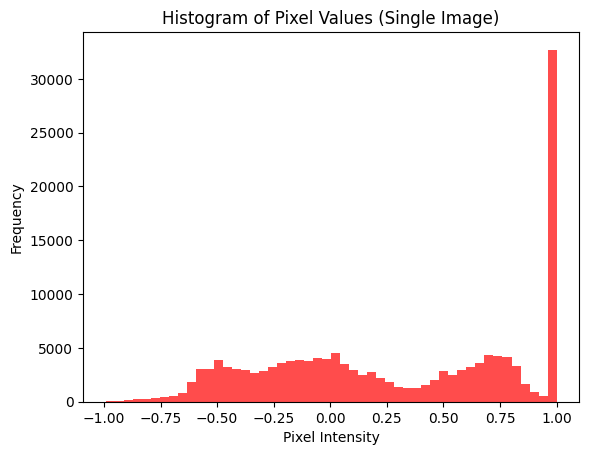

In [70]:
# Extract processed tensor (normalized pixel values)
pixel_values_np = pixel_values["pixel_values"].squeeze(0).numpy().flatten()  # Remove batch dim and flatten

# Plot histogram
plt.hist(pixel_values_np, bins=50, color="red", alpha=0.7)
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.title("Histogram of Pixel Values (Single Image)")
plt.show()


#### 3. Do it for several images 

##### 3.1) WIth Normalization

In [48]:
# Doing it for several images with normalization

# Initialize empty lists to store processed data (with normalization)
train_pixel_values_norm = []
dev_pixel_values_norm = []
test_pixel_values_norm = []

# Function to process dataset manually (WITH normalization)
def process_dataset_with_norm(dataset, dataset_name):
    pixel_values_list = []  # Store processed images

    for i in range(len(dataset["train"])):  # Loop through all samples
        image = dataset["train"][i]["image"]  # Extract image
        pixel_values = image_processor(image, return_tensors="pt")["pixel_values"].squeeze(0)  # Convert to tensor
        pixel_values_list.append(pixel_values)  # Store processed tensor

        # Print details for debugging
        print(f"{dataset_name} - Image {i+1}/{len(dataset['train'])}:")
        print("Processed Tensor Shape:", pixel_values.shape)
        print("Min Pixel Value After Processing:", pixel_values.min().item())
        print("Max Pixel Value After Processing:", pixel_values.max().item())
        print("-" * 50)  # Separator for readability

    return torch.stack(pixel_values_list)  # Stack into a single tensor batch

# Process each dataset (WITH normalization)
train_pixel_values_norm = process_dataset_with_norm(train_colour, "Train Dataset")
dev_pixel_values_norm = process_dataset_with_norm(dev_colour, "Dev Dataset")
test_pixel_values_norm = process_dataset_with_norm(test_colour, "Test Dataset")

# Print final dataset shapes
print("Final Train Dataset Shape (Normalized):", train_pixel_values_norm.shape)  # (num_images, 3, 224, 224)
print("Final Dev Dataset Shape (Normalized):", dev_pixel_values_norm.shape)  # (num_images, 3, 224, 224)
print("Final Test Dataset Shape (Normalized):", test_pixel_values_norm.shape)  # (num_images, 3, 224, 224)


Train Dataset - Image 1/100:
Processed Tensor Shape: torch.Size([3, 224, 224])
Min Pixel Value After Processing: -0.9921568632125854
Max Pixel Value After Processing: 1.0
--------------------------------------------------
Train Dataset - Image 2/100:
Processed Tensor Shape: torch.Size([3, 224, 224])
Min Pixel Value After Processing: -1.0
Max Pixel Value After Processing: 1.0
--------------------------------------------------
Train Dataset - Image 3/100:
Processed Tensor Shape: torch.Size([3, 224, 224])
Min Pixel Value After Processing: -1.0
Max Pixel Value After Processing: 1.0
--------------------------------------------------
Train Dataset - Image 4/100:
Processed Tensor Shape: torch.Size([3, 224, 224])
Min Pixel Value After Processing: -1.0
Max Pixel Value After Processing: 1.0
--------------------------------------------------
Train Dataset - Image 5/100:
Processed Tensor Shape: torch.Size([3, 224, 224])
Min Pixel Value After Processing: -1.0
Max Pixel Value After Processing: 1.0
-

##### 3.2) Without Normalization, Raw pixel values

In [84]:
# Raw pixel values
# Define a transformation that ensures raw pixel values [0-255]
"""
transform_raw = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize to match model input
    transforms.ToTensor(),  # Converts image to tensor (0-1 range)
    transforms.Lambda(lambda x: x * 255)  # Scale back to 0-255
])
"""
# Function to process dataset manually (TRUE RAW, WITHOUT normalization)
def process_dataset_raw(dataset, dataset_name):
    pixel_values_list = []  # Store processed images

    for i in range(len(dataset["train"])):  # Loop through all samples
        image = dataset["train"][i]["image"]  # Extract image
        pixel_values = transform_raw(image)  # Apply transformation
        pixel_values_list.append(pixel_values)  # Store processed tensor

        # Print details for debugging
        print(f"{dataset_name} - Image {i+1}/{len(dataset['train'])}:")
        print("Processed Tensor Shape:", pixel_values.shape)
        print("Min Pixel Value After Processing:", pixel_values.min().item())  # Should be 0
        print("Max Pixel Value After Processing:", pixel_values.max().item())  # Should be 255
        print("-" * 50)  # Separator for readability

    return torch.stack(pixel_values_list)  # Stack into a single tensor batch

# Process each dataset without normalization (RAW pixel values)
train_pixel_values_raw = process_dataset_raw(train_colour, "Train Dataset")
dev_pixel_values_raw = process_dataset_raw(dev_colour, "Dev Dataset")
test_pixel_values_raw = process_dataset_raw(test_colour, "Test Dataset")

# Print final dataset shapes
print("Final Train Dataset Shape (RAW Pixel Values):", train_pixel_values_raw.shape)  # (num_images, 3, 224, 224)
print("Final Dev Dataset Shape (RAW Pixel Values):", dev_pixel_values_raw.shape)  # (num_images, 3, 224, 224)
print("Final Test Dataset Shape (RAW Pixel Values):", test_pixel_values_raw.shape)  # (num_images, 3, 224, 224)


Train Dataset - Image 1/100:
Processed Tensor Shape: torch.Size([3, 224, 224])
Min Pixel Value After Processing: 1.0
Max Pixel Value After Processing: 255.0
--------------------------------------------------
Train Dataset - Image 2/100:
Processed Tensor Shape: torch.Size([3, 224, 224])
Min Pixel Value After Processing: 0.0
Max Pixel Value After Processing: 255.0
--------------------------------------------------
Train Dataset - Image 3/100:
Processed Tensor Shape: torch.Size([3, 224, 224])
Min Pixel Value After Processing: 0.0
Max Pixel Value After Processing: 255.0
--------------------------------------------------
Train Dataset - Image 4/100:
Processed Tensor Shape: torch.Size([3, 224, 224])
Min Pixel Value After Processing: 0.0
Max Pixel Value After Processing: 255.0
--------------------------------------------------
Train Dataset - Image 5/100:
Processed Tensor Shape: torch.Size([3, 224, 224])
Min Pixel Value After Processing: 0.0
Max Pixel Value After Processing: 255.0
-----------

##### 4) Print both pixel values 

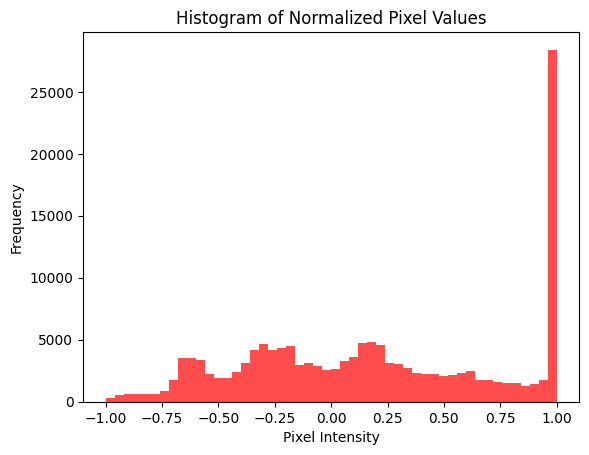

In [86]:

# Extract processed tensor (normalized) from the dataset
pixel_values_norm = train_pixel_values_norm[2]  # Select an image from the dataset

# Convert to NumPy array & Flatten
pixel_values_norm_np = pixel_values_norm.numpy().flatten()

# Plot histogram
plt.hist(pixel_values_norm_np, bins=50, color="red", alpha=0.7)
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.title("Histogram of Normalized Pixel Values")
plt.show()


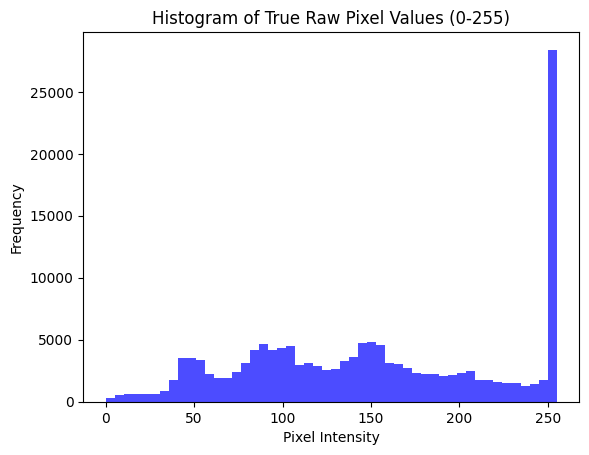

In [85]:

# Extract processed tensor (RAW, not normalized) from the dataset
pixel_values_raw = train_pixel_values_raw[2]  # Select an image from the dataset

# Convert to NumPy array & Flatten
pixel_values_raw_np = pixel_values_raw.numpy().flatten()

# Plot histogram
plt.hist(pixel_values_raw_np, bins=50, color="blue", alpha=0.7)
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.title("Histogram of True Raw Pixel Values (0-255)")
plt.show()


In [59]:
print(train_pixel_values_raw[1])
print(pixel_values_norm[1])

tensor([[[255., 255., 255.,  ..., 255., 255., 255.],
         [255., 255., 255.,  ..., 255., 255., 255.],
         [255., 255., 255.,  ..., 255., 255., 255.],
         ...,
         [255., 255., 255.,  ..., 255., 255., 255.],
         [255., 255., 255.,  ..., 255., 255., 255.],
         [255., 255., 255.,  ..., 255., 255., 255.]],

        [[255., 255., 255.,  ..., 255., 255., 255.],
         [255., 255., 255.,  ..., 255., 255., 255.],
         [255., 255., 255.,  ..., 255., 255., 255.],
         ...,
         [255., 255., 255.,  ..., 255., 255., 255.],
         [255., 255., 255.,  ..., 255., 255., 255.],
         [255., 255., 255.,  ..., 255., 255., 255.]],

        [[255., 255., 255.,  ..., 255., 255., 255.],
         [255., 255., 255.,  ..., 255., 255., 255.],
         [255., 255., 255.,  ..., 255., 255., 255.],
         ...,
         [255., 255., 255.,  ..., 255., 255., 255.],
         [255., 255., 255.,  ..., 255., 255., 255.],
         [255., 255., 255.,  ..., 255., 255., 255.]]]

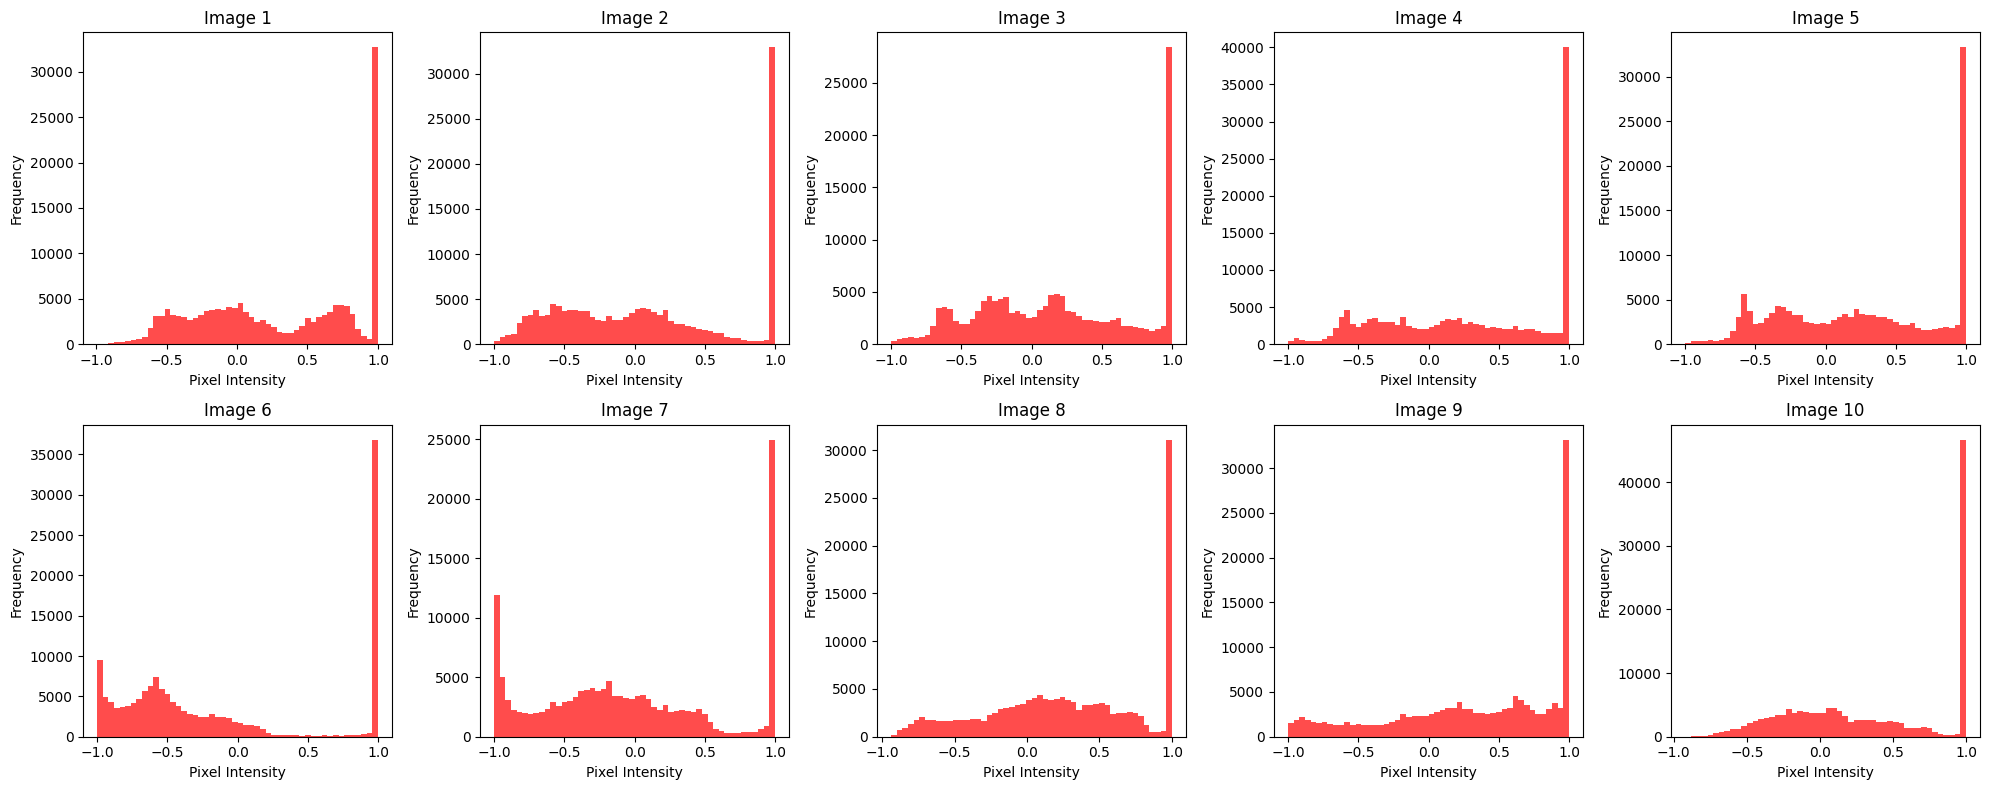

In [ ]:
##Plot the first 10 images normalized pixel values
# Set up a figure with multiple subplots (2 rows, 5 columns)
fig, axes = plt.subplots(2, 5, figsize=(20, 8))  # 2 rows, 5 columns

# Loop through the first 10 images
for i in range(10):
    # Extract processed tensor (normalized) from the dataset
    pixel_values_norm = train_pixel_values_norm[i]  # Select image from dataset

    # Convert to NumPy array & Flatten
    pixel_values_norm_np = pixel_values_norm.numpy().flatten()

    # Get row and column index for subplot
    row, col = i // 5, i % 5  # Arrange in a 2x5 grid

    # Plot histogram on corresponding subplot
    axes[row, col].hist(pixel_values_norm_np, bins=50, color="red", alpha=0.7)
    axes[row, col].set_xlabel("Pixel Intensity")
    axes[row, col].set_ylabel("Frequency")
    axes[row, col].set_title(f"Image {i+1}")

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


In [ ]:
#convert both the pixel values and keep the laels 
import torch
from torchvision import transforms

# Define a transformation for normalization (assuming ViT normalization: [-1,1])
transform_norm = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize image
    transforms.ToTensor(),  # Convert image to tensor (0-1 range)
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])  # Normalize to [-1, 1]
])

# Create a label mapping (assign a unique number to each class)
label_mapping = {"Neu": 0, "Pos": 1, "Neg": 2}  # Add all your labels

# Function to process dataset with normalization and numeric labels
def process_dataset_norm_with_labels(dataset, dataset_name):
    pixel_values_list = []  # Store processed images
    labels_list = []  # Store numeric labels

    for i in range(len(dataset["train"])):  # Loop through all samples
        image = dataset["train"][i]["image"]  # Extract image
        label = dataset["train"][i]["label"]  # Extract label (as string)

        # Convert label from string to number
        label_num = label_mapping[label]  # Map string label to numerical value

        pixel_values = transform_norm(image)  # Apply normalization
        pixel_values_list.append(pixel_values)  # Store processed tensor
        labels_list.append(label_num)  # Store numeric label

        # Print details for debugging
        print(f"{dataset_name} - Image {i+1}/{len(dataset['train'])}: Label: {label} ({label_num})")
        print("Processed Tensor Shape:", pixel_values.shape)
        print("Min Pixel Value After Processing:", pixel_values.min().item())  # Should be close to -1
        print("Max Pixel Value After Processing:", pixel_values.max().item())  # Should be close to 1
        print("-" * 50)  # Separator for readability

    return torch.stack(pixel_values_list), torch.tensor(labels_list, dtype=torch.long)  # Return both images and labels

# Process dataset while keeping labels (NORMALIZED)
train_pixel_values_norm, train_labels = process_dataset_norm_with_labels(train_colour, "Train Dataset")
dev_pixel_values_norm, dev_labels = process_dataset_norm_with_labels(dev_colour, "Dev Dataset")
test_pixel_values_norm, test_labels = process_dataset_norm_with_labels(test_colour, "Test Dataset")

# Print final dataset shapes
print("Final Train Dataset Shape (Normalized Pixel Values):", train_pixel_values_norm.shape)  # (num_images, 3, 224, 224)
print("Final Train Labels Shape:", train_labels.shape)  # (num_images,)


Train Dataset - Image 1/100: Label: Neg (2)
Processed Tensor Shape: torch.Size([3, 224, 224])
Min Pixel Value After Processing: -0.9921568632125854
Max Pixel Value After Processing: 1.0
--------------------------------------------------
Train Dataset - Image 2/100: Label: Neu (0)
Processed Tensor Shape: torch.Size([3, 224, 224])
Min Pixel Value After Processing: -1.0
Max Pixel Value After Processing: 1.0
--------------------------------------------------
Train Dataset - Image 3/100: Label: Pos (1)
Processed Tensor Shape: torch.Size([3, 224, 224])
Min Pixel Value After Processing: -1.0
Max Pixel Value After Processing: 1.0
--------------------------------------------------
Train Dataset - Image 4/100: Label: Neg (2)
Processed Tensor Shape: torch.Size([3, 224, 224])
Min Pixel Value After Processing: -1.0
Max Pixel Value After Processing: 1.0
--------------------------------------------------
Train Dataset - Image 5/100: Label: Pos (1)
Processed Tensor Shape: torch.Size([3, 224, 224])
Min

tensor([[[1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         ...,
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.]],

        [[1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         ...,
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.]],

        [[1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         ...,
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.]]])
tensor([2, 0, 1, 2, 1, 2, 1, 2, 1, 2, 0, 1, 2, 1, 0, 1, 2, 2, 0, 1, 2, 1, 2, 1,
        2, 1, 2, 0, 1, 1, 0, 0, 0, 1, 2, 0, 2, 1, 2, 1, 2, 0, 1, 2, 1, 2, 0, 1,
        2, 1, 2, 2, 2, 1, 2, 1, 2, 0, 1, 2, 1, 2, 0, 1

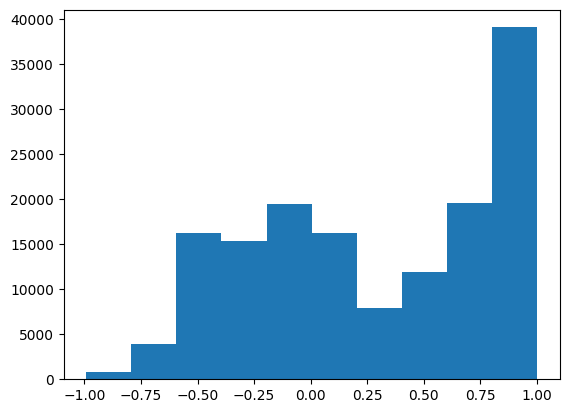

In [82]:
print(train_pixel_values_norm[0])
plt.hist(train_pixel_values_norm[0].numpy().flatten())
print(train_labels)

#### Try the Pytorch Dataloader that can handel lables and tensors as well


In [89]:
## Create a pythorvh Dataset
import torch
from torch.utils.data import Dataset, DataLoader

class ImageDataset(Dataset):
    def __init__(self, images, labels):
        self.images = images  # Normalized images
        self.labels = labels  # Class labels

    def __len__(self):
        return len(self.images)  # Number of images in dataset

    def __getitem__(self, idx):
        return self.images[idx], self.labels[idx]  # Return (image, label) pair


In [90]:
## Create dataset Objects
# Create dataset for training, validation, and testing
train_dataset = ImageDataset(train_pixel_values_norm, train_labels)
dev_dataset = ImageDataset(dev_pixel_values_norm, dev_labels)
test_dataset = ImageDataset(test_pixel_values_norm, test_labels)


In [93]:
print(train_dataset)

In [94]:
# Create dataLoader
# Define batch size
batch_size = 32

# Create DataLoaders
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
dev_loader = DataLoader(dev_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


In [95]:
print(train_loader)

In [96]:
# Fetch a batch of images and labels
images, labels = next(iter(train_loader))

print("Image Batch Shape:", images.shape)  # Should be (batch_size, 3, 224, 224)
print("Label Batch Shape:", labels.shape)  # Should be (batch_size,)
print("Example Labels:", labels)  # Print some labels to verify


Image Batch Shape: torch.Size([32, 3, 224, 224])
Label Batch Shape: torch.Size([32])
Example Labels: tensor([2, 0, 1, 2, 2, 1, 2, 1, 0, 0, 2, 0, 1, 1, 1, 1, 2, 0, 1, 1, 2, 2, 0, 1,
        2, 2, 2, 0, 1, 1, 0, 1])


#### Load the model

In [97]:
# Load the pre-trained ViT model
model = AutoModelForImageClassification.from_pretrained("motheecreator/vit-Facial-Expression-Recognition")

c:\Users\45911\AppData\Local\Programs\Python\Python311\Lib\site-packages\huggingface_hub\file_download.py:795: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


In [98]:
print(model.config.num_labels)  # Should print 3 for your dataset (Neg, Neu, Pos)
print(model.config.id2label)    # Shows the mapping from index to label


7
{0: 'anger', 1: 'disgust', 2: 'fear', 3: 'happy', 4: 'neutral', 5: 'sad', 6: 'surprise'}


In [99]:
import torch
import torch.nn as nn
from transformers import AutoImageProcessor, AutoModelForImageClassification

# Load the processor (remains unchanged)
processor = AutoImageProcessor.from_pretrained("motheecreator/vit-Facial-Expression-Recognition")

# Load the pretrained model
model = AutoModelForImageClassification.from_pretrained(
    "motheecreator/vit-Facial-Expression-Recognition"
)

# Change the classification head to match 3 classes
num_classes = 3  # Your dataset has 3 classes: Neu, Pos, Neg
model.classifier = nn.Linear(model.config.hidden_size, num_classes)

# Update the number of labels in config
model.config.num_labels = num_classes

# Move model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Print updated model
print(model)


ViTForImageClassification(
  (vit): ViTModel(
    (embeddings): ViTEmbeddings(
      (patch_embeddings): ViTPatchEmbeddings(
        (projection): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
      )
      (dropout): Dropout(p=0.0, inplace=False)
    )
    (encoder): ViTEncoder(
      (layer): ModuleList(
        (0-11): 12 x ViTLayer(
          (attention): ViTAttention(
            (attention): ViTSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
            (output): ViTSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
          )
          (intermediate): ViTIntermediate(
            (dense): Linear(in_features=7

In [100]:
# Define loss funciotn and optimizer
import torch
import torch.nn as nn
import torch.optim as optim

# Define loss function (CrossEntropyLoss for classification)
criterion = nn.CrossEntropyLoss()

# Define optimizer (AdamW is efficient for transformers)
optimizer = optim.AdamW(model.parameters(), lr=5e-5, weight_decay=1e-4)


In [101]:
# traiing process 
from tqdm import tqdm  # For progress bar

# Training settings
num_epochs = 5  # Change based on dataset size
train_loss_history = []

# Loop over epochs
for epoch in range(num_epochs):
    model.train()  # Set model to training mode
    running_loss = 0.0
    
    progress_bar = tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs}", leave=False)

    for batch in progress_bar:
        images, labels = batch  # Get batch data
        images, labels = images.to(device), labels.to(device)  # Move to GPU if available
        
        optimizer.zero_grad()  # Reset gradients

        outputs = model(images)  # Forward pass
        loss = criterion(outputs.logits, labels)  # Compute loss

        loss.backward()  # Backpropagation
        optimizer.step()  # Update weights
        
        running_loss += loss.item()
        progress_bar.set_postfix(loss=loss.item())  # Update progress bar

    avg_loss = running_loss / len(train_loader)
    train_loss_history.append(avg_loss)
    
    print(f"Epoch {epoch+1}/{num_epochs} - Train Loss: {avg_loss:.4f}")

print("Training Complete!")


Epoch 1/5 - Train Loss: 0.9437


Epoch 2/5 - Train Loss: 0.6724


Epoch 3/5 - Train Loss: 0.4612


Epoch 4/5 - Train Loss: 0.3355


Epoch 5/5 - Train Loss: 0.2344
Training Complete!


In [102]:
def evaluate(model, data_loader, criterion, device):
    model.eval()  # Set to evaluation mode
    total_loss = 0.0
    correct = 0
    total_samples = 0

    with torch.no_grad():  # No gradients needed
        for images, labels in data_loader:
            images, labels = images.to(device), labels.to(device)

            outputs = model(images)
            loss = criterion(outputs.logits, labels)

            total_loss += loss.item()
            predictions = torch.argmax(outputs.logits, dim=1)  # Get class with highest probability
            correct += (predictions == labels).sum().item()
            total_samples += labels.size(0)

    avg_loss = total_loss / len(data_loader)
    accuracy = correct / total_samples * 100  # Convert to percentage
    return avg_loss, accuracy


In [103]:
# Training settings
num_epochs = 5  # Adjust based on dataset size
train_loss_history = []
dev_loss_history = []
dev_acc_history = []

for epoch in range(num_epochs):
    model.train()  # Set model to training mode
    running_loss = 0.0
    
    progress_bar = tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs}", leave=False)

    for batch in progress_bar:
        images, labels = batch
        images, labels = images.to(device), labels.to(device)
        
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs.logits, labels)
        
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        progress_bar.set_postfix(loss=loss.item())

    avg_train_loss = running_loss / len(train_loader)
    train_loss_history.append(avg_train_loss)

    # Run validation
    dev_loss, dev_acc = evaluate(model, dev_loader, criterion, device)
    dev_loss_history.append(dev_loss)
    dev_acc_history.append(dev_acc)

    print(f"Epoch {epoch+1}/{num_epochs} - Train Loss: {avg_train_loss:.4f} | Dev Loss: {dev_loss:.4f} | Dev Accuracy: {dev_acc:.2f}%")

print("Training & Validation Complete!")


Epoch 1/5 - Train Loss: 0.1788 | Dev Loss: 0.3048 | Dev Accuracy: 92.00%


Epoch 2/5 - Train Loss: 0.1364 | Dev Loss: 0.2806 | Dev Accuracy: 96.00%


Epoch 3/5 - Train Loss: 0.1088 | Dev Loss: 0.2724 | Dev Accuracy: 96.00%


Epoch 4/5 - Train Loss: 0.0882 | Dev Loss: 0.2638 | Dev Accuracy: 92.00%


Epoch 5/5 - Train Loss: 0.0731 | Dev Loss: 0.2536 | Dev Accuracy: 92.00%
Training & Validation Complete!


## check where exactly the model makes mistakes 

In [106]:
def count_misclassified(model, data_loader, device):
    model.eval()  # Set to evaluation mode
    total_misclassified = 0
    total_images = 0

    with torch.no_grad():
        for images, labels in data_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            predictions = torch.argmax(outputs.logits, dim=1)  # Get predicted label
            
            # Count misclassifications
            total_misclassified += (predictions != labels).sum().item()
            total_images += labels.size(0)

    return total_misclassified, total_images


In [108]:
misclassified_count, total_test_samples = count_misclassified(model, test_loader, device)

print(f"Total Test Images: {total_test_samples}")
print(f"Misclassified Images: {misclassified_count}")
print(f"Misclassification Rate: {100 * misclassified_count / total_test_samples:.2f}%")


Total Test Images: 25
Misclassified Images: 3
Misclassification Rate: 12.00%


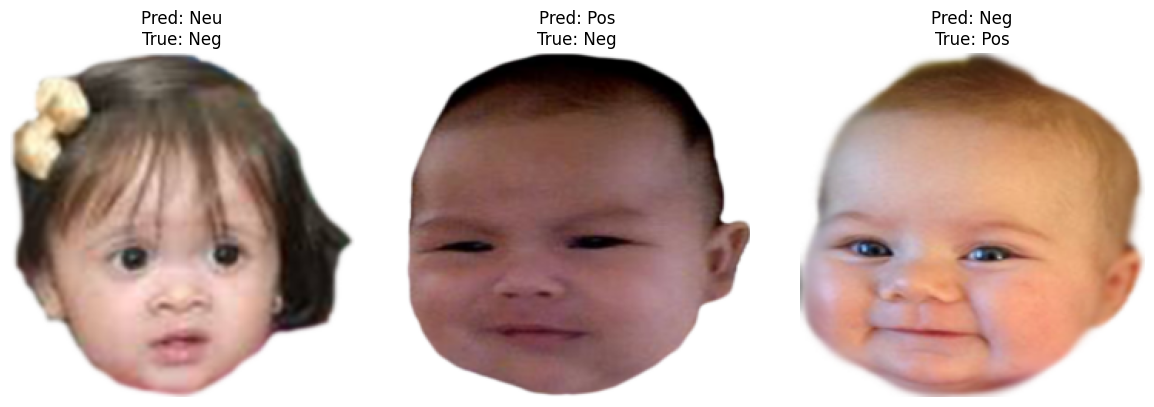

In [109]:
import matplotlib.pyplot as plt

# Map label numbers to their names
label_mapping = {0: "Neu", 1: "Pos", 2: "Neg"}

# Get 3 misclassified images
misclassified_images = find_misclassified(model, test_loader, device, num_mistakes=3)

# Plot images
fig, axes = plt.subplots(1, 3, figsize=(12, 4))  # 1 row, 3 columns

for i, (img, pred, true) in enumerate(misclassified_images):
    img = img.permute(1, 2, 0).numpy()  # Convert tensor to NumPy image
    img = (img - img.min()) / (img.max() - img.min())  # Normalize for display

    axes[i].imshow(img)
    axes[i].set_title(f"Pred: {label_mapping[pred]}\nTrue: {label_mapping[true]}")
    axes[i].axis("off")

plt.tight_layout()
plt.show()
